<a href="https://colab.research.google.com/github/homeromolina/Analysis/blob/main/Machine_Learning_for_traders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importando bibliotecas**

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.2 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

# **Baixando os dados**

In [ ]:
start = dt.datetime(2020,1,1)
#end   = dt.datetime(2022,7,1)

import yfinance as yf
yf.pdr_override()

In [ ]:
df_analysis = web.get_data_yahoo('PETR4.SA', ##escolha o ticker e coloque aqui
                          start = start)
df_analysis

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,30.510000,30.700001,30.309999,30.700001,20.466221,37774500
2020-01-03,30.879999,31.240000,30.450001,30.450001,20.299557,71595600
2020-01-06,30.430000,30.940001,29.950001,30.809999,20.539549,81844000
2020-01-07,30.820000,30.879999,30.469999,30.690001,20.459553,32822000
2020-01-08,30.690001,30.770000,30.240000,30.500000,20.332890,48215600
...,...,...,...,...,...,...
2022-07-18,28.389999,28.690001,28.299999,28.600000,28.600000,46782300
2022-07-19,28.549999,29.240000,28.400000,29.180000,29.180000,48562300
2022-07-20,29.070000,29.219999,28.830000,29.170000,29.170000,43520800


In [ ]:
# pegando cotações de diferentes setores/indices e empresas
tickers = web.get_data_yahoo(['BCX','BMIX','^BVSP','BTC-USD','^GSPC','^DJI','FXI','PBR','ITUB4.SA','ETH-USD','CLF','X','NUE','STLD'],   
                          start = start)['Adj Close']
tickers.reset_index(inplace = True)
tickers

[*********************100%***********************]  14 of 14 completed


,Date,BCX,BMIX,BTC-USD,CLF,ETH-USD,FXI,ITUB4.SA,NUE,PBR,STLD,X,^BVSP,^DJI,^GSPC
0,2020-01-01,NaN,NaN,7200.174316,NaN,130.802002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,6.864033,0.0016,6985.470215,7.716211,127.410179,43.033306,35.588448,51.683109,10.995300,31.681137,10.689927,118573.0,28868.800781,3257.850098
2,2020-01-03,6.889393,0.0016,7344.884277,7.696527,134.171707,42.103222,35.214130,50.998627,10.806075,31.118753,10.610887,117707.0,28634.880859,3234.850098
3,2020-01-04,NaN,NaN,7410.656738,NaN,135.069366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,7411.317383,NaN,136.276779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2022-07-19,8.470000,0.0170,23389.433594,16.450001,1542.975220,31.950001,23.620001,117.230003,11.660000,66.620003,19.280001,98245.0,31827.050781,3936.689941
931,2022-07-20,8.560000,0.0156,23231.732422,16.600000,1520.200684,31.750000,23.320000,117.750000,11.630000,68.099998,19.750000,98287.0,31874.839844,3959.899902
932,2022-07-21,8.620000,0.0165,23164.628906,17.139999,1576.749512,32.009998,23.510000,128.520004,11.470000,70.730003,20.360001,99033.0,32036.900391,3998.949951
933,2022-07-22,8.550000,0.0164,22714.978516,15.620000,1537.405151,31.299999,23.260000,119.860001,11.640000,66.599998,19.760000,98925.0,31899.289062,3961.629883


In [ ]:
tickers.isnull().sum()

Date          0
BCX         291
BMIX        291
BTC-USD       0
CLF         291
ETH-USD       0
FXI         291
ITUB4.SA    300
NUE         291
PBR         291
STLD        291
X           291
^BVSP       300
^DJI        291
^GSPC       291
dtype: int64

In [ ]:
# Retirando todos os valores com NaN
tickers.dropna(inplace = True)

# Reset no Index
tickers.reset_index(inplace = True)
tickers.pop('index')
tickers

,Date,BCX,BMIX,BTC-USD,CLF,ETH-USD,FXI,ITUB4.SA,NUE,PBR,STLD,X,^BVSP,^DJI,^GSPC
0,2020-01-02,6.864033,0.0016,6985.470215,7.716211,127.410179,43.033306,35.588448,51.683109,10.995300,31.681137,10.689927,118573.0,28868.800781,3257.850098
1,2020-01-03,6.889393,0.0016,7344.884277,7.696527,134.171707,42.103222,35.214130,50.998627,10.806075,31.118753,10.610887,117707.0,28634.880859,3234.850098
2,2020-01-06,6.855578,0.0016,7769.219238,7.667000,144.304153,42.304581,34.690083,50.567314,10.961509,31.025019,10.660288,116878.0,28703.380859,3246.280029
3,2020-01-07,6.796407,0.0016,8163.692383,7.873684,143.543991,42.199104,33.885288,50.454800,10.853380,31.709261,10.996202,116662.0,28583.679688,3237.179932
4,2020-01-08,6.745689,0.0016,8079.862793,7.804790,141.258133,42.170341,33.333176,50.332905,10.610093,31.737387,10.966561,116247.0,28745.089844,3253.050049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,2022-07-18,8.300000,0.0169,22485.689453,15.530000,1578.717896,31.629999,22.850000,114.470001,11.470000,67.709999,18.500000,96916.0,31072.609375,3830.850098
616,2022-07-19,8.470000,0.0170,23389.433594,16.450001,1542.975220,31.950001,23.620001,117.230003,11.660000,66.620003,19.280001,98245.0,31827.050781,3936.689941
617,2022-07-20,8.560000,0.0156,23231.732422,16.600000,1520.200684,31.750000,23.320000,117.750000,11.630000,68.099998,19.750000,98287.0,31874.839844,3959.899902
618,2022-07-21,8.620000,0.0165,23164.628906,17.139999,1576.749512,32.009998,23.510000,128.520004,11.470000,70.730003,20.360001,99033.0,32036.900391,3998.949951


In [ ]:
tickers.isnull().sum()

Date        0
BCX         0
BMIX        0
BTC-USD     0
CLF         0
ETH-USD     0
FXI         0
ITUB4.SA    0
NUE         0
PBR         0
STLD        0
X           0
^BVSP       0
^DJI        0
^GSPC       0
dtype: int64

In [ ]:
df = df_analysis.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,30.510000,30.700001,30.309999,30.700001,20.466221,37774500
1,2020-01-03,30.879999,31.240000,30.450001,30.450001,20.299557,71595600
2,2020-01-06,30.430000,30.940001,29.950001,30.809999,20.539549,81844000
3,2020-01-07,30.820000,30.879999,30.469999,30.690001,20.459553,32822000
4,2020-01-08,30.690001,30.770000,30.240000,30.500000,20.332890,48215600
...,...,...,...,...,...,...,...
630,2022-07-18,28.389999,28.690001,28.299999,28.600000,28.600000,46782300
631,2022-07-19,28.549999,29.240000,28.400000,29.180000,29.180000,48562300
632,2022-07-20,29.070000,29.219999,28.830000,29.170000,29.170000,43520800
633,2022-07-21,28.980000,29.129999,28.200001,29.020000,29.020000,58843200


In [ ]:
#df_tickers = tickers.reset_index()
all_tickers = pd.merge(df, tickers, how="inner",on = ["Date"])
df_corr = all_tickers.drop(['Date','Open','High','Low','Close'],axis = 1)
#df_corr.dropna(inplace = True)
#df_corr.reset_index(inplace = True)
#df_corr.pop('index')
df_corr

,Adj Close,Volume,BCX,BMIX,BTC-USD,CLF,ETH-USD,FXI,ITUB4.SA,NUE,PBR,STLD,X,^BVSP,^DJI,^GSPC
0,20.466221,37774500,6.864033,0.0016,6985.470215,7.716211,127.410179,43.033306,35.588448,51.683109,10.995300,31.681137,10.689927,118573.0,28868.800781,3257.850098
1,20.299557,71595600,6.889393,0.0016,7344.884277,7.696527,134.171707,42.103222,35.214130,50.998627,10.806075,31.118753,10.610887,117707.0,28634.880859,3234.850098
2,20.539549,81844000,6.855578,0.0016,7769.219238,7.667000,144.304153,42.304581,34.690083,50.567314,10.961509,31.025019,10.660288,116878.0,28703.380859,3246.280029
3,20.459553,32822000,6.796407,0.0016,8163.692383,7.873684,143.543991,42.199104,33.885288,50.454800,10.853380,31.709261,10.996202,116662.0,28583.679688,3237.179932
4,20.332890,48215600,6.745689,0.0016,8079.862793,7.804790,141.258133,42.170341,33.333176,50.332905,10.610093,31.737387,10.966561,116247.0,28745.089844,3253.050049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,28.600000,46782300,8.300000,0.0169,22485.689453,15.530000,1578.717896,31.629999,22.850000,114.470001,11.470000,67.709999,18.500000,96916.0,31072.609375,3830.850098
616,29.180000,48562300,8.470000,0.0170,23389.433594,16.450001,1542.975220,31.950001,23.620001,117.230003,11.660000,66.620003,19.280001,98245.0,31827.050781,3936.689941
617,29.170000,43520800,8.560000,0.0156,23231.732422,16.600000,1520.200684,31.750000,23.320000,117.750000,11.630000,68.099998,19.750000,98287.0,31874.839844,3959.899902
618,29.020000,58843200,8.620000,0.0165,23164.628906,17.139999,1576.749512,32.009998,23.510000,128.520004,11.470000,70.730003,20.360001,99033.0,32036.900391,3998.949951


In [ ]:
all_tickers.head() #Usaremos posteriormente este DataFrame para ter as datas das cotações

,Date,Open,High,Low,Close,Adj Close,Volume,BCX,BMIX,BTC-USD,...,ETH-USD,FXI,ITUB4.SA,NUE,PBR,STLD,X,^BVSP,^DJI,^GSPC
0,2020-01-02,30.510000,30.700001,30.309999,30.700001,20.466221,37774500,6.864033,0.0016,6985.470215,...,127.410179,43.033306,35.588448,51.683109,10.995300,31.681137,10.689927,118573.0,28868.800781,3257.850098
1,2020-01-03,30.879999,31.240000,30.450001,30.450001,20.299557,71595600,6.889393,0.0016,7344.884277,...,134.171707,42.103222,35.214130,50.998627,10.806075,31.118753,10.610887,117707.0,28634.880859,3234.850098
2,2020-01-06,30.430000,30.940001,29.950001,30.809999,20.539549,81844000,6.855578,0.0016,7769.219238,...,144.304153,42.304581,34.690083,50.567314,10.961509,31.025019,10.660288,116878.0,28703.380859,3246.280029
3,2020-01-07,30.820000,30.879999,30.469999,30.690001,20.459553,32822000,6.796407,0.0016,8163.692383,...,143.543991,42.199104,33.885288,50.454800,10.853380,31.709261,10.996202,116662.0,28583.679688,3237.179932
4,2020-01-08,30.690001,30.770000,30.240000,30.500000,20.332890,48215600,6.745689,0.0016,8079.862793,...,141.258133,42.170341,33.333176,50.332905,10.610093,31.737387,10.966561,116247.0,28745.089844,3253.050049


Adj Close    1.000000
PBR          0.967385
BCX          0.834861
NUE          0.832536
STLD         0.826589
CLF          0.718585
X            0.698177
^GSPC        0.661692
^DJI         0.653799
ETH-USD      0.539436
^BVSP        0.432725
BTC-USD      0.402626
BMIX         0.191643
ITUB4.SA     0.099516
Volume      -0.188828
FXI         -0.512510
Name: Adj Close, dtype: float64

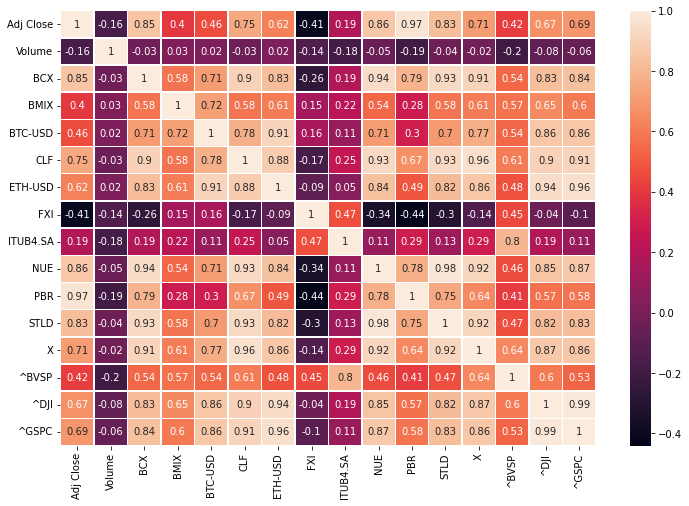

In [ ]:
# Correlações com o Adj Close 

#Correlacoes - por hash

import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(12, 8))
sns.heatmap(df_corr.corr('spearman').round(2), annot=True, linewidths=.5);
corr_matrix = df_corr.corr()
corr_matrix["Adj Close"].sort_values(ascending=False)

In [ ]:
# Correlações fortes que sejam maiores que 0.7
correlacao_pos = df_corr.corr('spearman').unstack()
correlacao_pos = correlacao_pos[correlacao_pos >= 0.7][correlacao_pos<1]
correlacao_pos

Adj Close  BCX        0.848790
           CLF        0.751207
           NUE        0.862296
           PBR        0.966915
           STLD       0.833141
                        ...   
^GSPC      ETH-USD    0.964125
           NUE        0.867695
           STLD       0.833069
           X          0.861184
           ^DJI       0.985034
Length: 92, dtype: float64

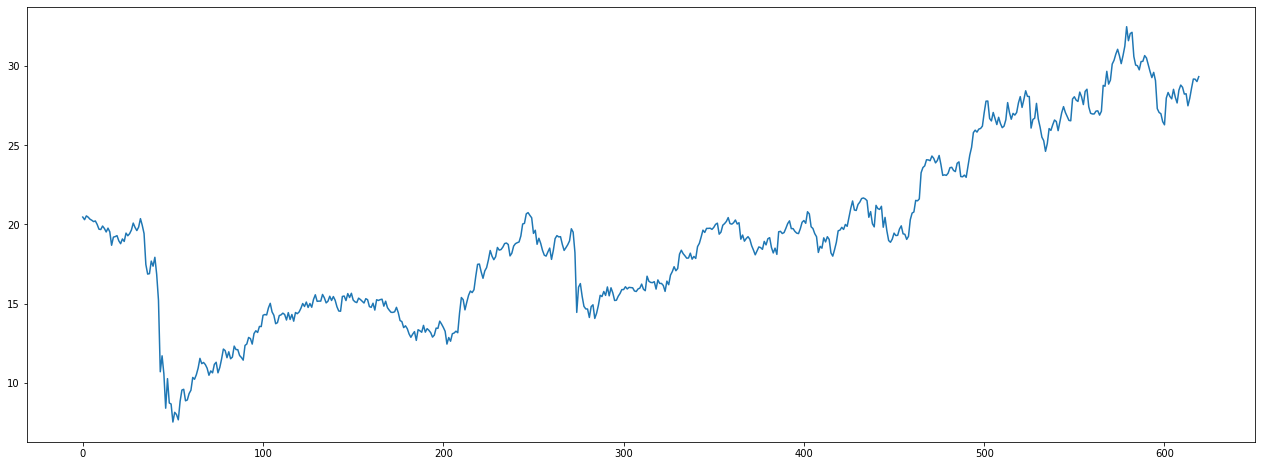

In [ ]:
df_corr["Adj Close"].plot(figsize=(22,8));

In [ ]:
# Atribuindo o dataframe que será utilizando no Isolation Forest 
df_IF = df_corr
df_IF

,Adj Close,Volume,BCX,BMIX,BTC-USD,CLF,ETH-USD,FXI,ITUB4.SA,NUE,PBR,STLD,X,^BVSP,^DJI,^GSPC
0,20.466221,37774500,6.864033,0.0016,6985.470215,7.716211,127.410179,43.033306,35.588448,51.683109,10.995300,31.681137,10.689927,118573.0,28868.800781,3257.850098
1,20.299557,71595600,6.889393,0.0016,7344.884277,7.696527,134.171707,42.103222,35.214130,50.998627,10.806075,31.118753,10.610887,117707.0,28634.880859,3234.850098
2,20.539549,81844000,6.855578,0.0016,7769.219238,7.667000,144.304153,42.304581,34.690083,50.567314,10.961509,31.025019,10.660288,116878.0,28703.380859,3246.280029
3,20.459553,32822000,6.796407,0.0016,8163.692383,7.873684,143.543991,42.199104,33.885288,50.454800,10.853380,31.709261,10.996202,116662.0,28583.679688,3237.179932
4,20.332890,48215600,6.745689,0.0016,8079.862793,7.804790,141.258133,42.170341,33.333176,50.332905,10.610093,31.737387,10.966561,116247.0,28745.089844,3253.050049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,28.600000,46782300,8.300000,0.0169,22485.689453,15.530000,1578.717896,31.629999,22.850000,114.470001,11.470000,67.709999,18.500000,96916.0,31072.609375,3830.850098
616,29.180000,48562300,8.470000,0.0170,23389.433594,16.450001,1542.975220,31.950001,23.620001,117.230003,11.660000,66.620003,19.280001,98245.0,31827.050781,3936.689941
617,29.170000,43520800,8.560000,0.0156,23231.732422,16.600000,1520.200684,31.750000,23.320000,117.750000,11.630000,68.099998,19.750000,98287.0,31874.839844,3959.899902
618,29.020000,58843200,8.620000,0.0165,23164.628906,17.139999,1576.749512,32.009998,23.510000,128.520004,11.470000,70.730003,20.360001,99033.0,32036.900391,3998.949951


# **Aplicando o Isolation Forest - Anomaly Detection**

In [ ]:
#Machine Learning Stage (Anomaly Detection - Isolation Forest)

# Importação da biblioteca do IsolationForest
from sklearn.ensemble import IsolationForest

# Modelo Isolation Forest
model = IsolationForest(contamination = 0.25,  # A % de anomalias que desejamos considerar
                       n_estimators = 300,
                       random_state  = 42)
model.fit(df_IF)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.25, n_estimators=300, random_state=42)

In [ ]:
# Gerando as Flags de Anomalia com o predict
anomaly_flags = model.predict(df_IF)

In [ ]:
## Gerando os Scores de Anomalia com o predict
anomaly_scores = model.score_samples(df_IF)

In [ ]:
# Transformando o array em DataFrame
df_results = pd.DataFrame()

# Adicionando os scores e flags no df_results
df_results['IF Scores'] = anomaly_scores
df_results['Flags'] = anomaly_flags

# Caso a Flag for -1 então Anomalia, senão é Normal
df_results['Flag Anomalia String'] = df_results['Flags'].apply(lambda x: 'Anomalia' if x == -1 else 'Normal')

# Adicionando o scores e flags no DataFrame 
all_tickers['IF Scores'] = df_results['IF Scores']
all_tickers['Flags'] = df_results['Flags']
all_tickers['Flag Anomalia String'] = df_results['Flag Anomalia String']
all_tickers

,Date,Open,High,Low,Close,Adj Close,Volume,BCX,BMIX,BTC-USD,...,NUE,PBR,STLD,X,^BVSP,^DJI,^GSPC,IF Scores,Flags,Flag Anomalia String
0,2020-01-02,30.510000,30.700001,30.309999,30.700001,20.466221,37774500,6.864033,0.0016,6985.470215,...,51.683109,10.995300,31.681137,10.689927,118573.0,28868.800781,3257.850098,-0.529162,-1,Anomalia
1,2020-01-03,30.879999,31.240000,30.450001,30.450001,20.299557,71595600,6.889393,0.0016,7344.884277,...,50.998627,10.806075,31.118753,10.610887,117707.0,28634.880859,3234.850098,-0.518887,-1,Anomalia
2,2020-01-06,30.430000,30.940001,29.950001,30.809999,20.539549,81844000,6.855578,0.0016,7769.219238,...,50.567314,10.961509,31.025019,10.660288,116878.0,28703.380859,3246.280029,-0.511954,-1,Anomalia
3,2020-01-07,30.820000,30.879999,30.469999,30.690001,20.459553,32822000,6.796407,0.0016,8163.692383,...,50.454800,10.853380,31.709261,10.996202,116662.0,28583.679688,3237.179932,-0.510756,-1,Anomalia
4,2020-01-08,30.690001,30.770000,30.240000,30.500000,20.332890,48215600,6.745689,0.0016,8079.862793,...,50.332905,10.610093,31.737387,10.966561,116247.0,28745.089844,3253.050049,-0.499777,-1,Anomalia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,2022-07-18,28.389999,28.690001,28.299999,28.600000,28.600000,46782300,8.300000,0.0169,22485.689453,...,114.470001,11.470000,67.709999,18.500000,96916.0,31072.609375,3830.850098,-0.516769,-1,Anomalia
616,2022-07-19,28.549999,29.240000,28.400000,29.180000,29.180000,48562300,8.470000,0.0170,23389.433594,...,117.230003,11.660000,66.620003,19.280001,98245.0,31827.050781,3936.689941,-0.509059,-1,Anomalia
617,2022-07-20,29.070000,29.219999,28.830000,29.170000,29.170000,43520800,8.560000,0.0156,23231.732422,...,117.750000,11.630000,68.099998,19.750000,98287.0,31874.839844,3959.899902,-0.504440,-1,Anomalia
618,2022-07-21,28.980000,29.129999,28.200001,29.020000,29.020000,58843200,8.620000,0.0165,23164.628906,...,128.520004,11.470000,70.730003,20.360001,99033.0,32036.900391,3998.949951,-0.510161,-1,Anomalia


In [ ]:
# Mostrando os resultados
print('-'*90)
print('Quantidade Total de Cash-Outs Analisados : '  + str(len(df_results)))
print('Quantidade de Cash-Outs Normais          : '  + str(sum(df_results['Flags'] == +1)))
print('Quantidade de Cash-Outs Anômalos         : '  + str(sum(df_results['Flags'] == -1)))
print('Porcentagem (%) de Cash-Outs Normais     : '  + str(round(100*sum(df_results['Flags'] == +1)/len(df_results),4)) + '%')
print('Porcentagem (%) de Cash-Outs Anormais    : '  + str(round(100*sum(df_results['Flags'] == -1)/len(df_results),4)) + '%')
print('-'*90)

------------------------------------------------------------------------------------------
Quantidade Total de Cash-Outs Analisados : 620
Quantidade de Cash-Outs Normais          : 465
Quantidade de Cash-Outs Anômalos         : 155
Porcentagem (%) de Cash-Outs Normais     : 75.0%
Porcentagem (%) de Cash-Outs Anormais    : 25.0%
------------------------------------------------------------------------------------------


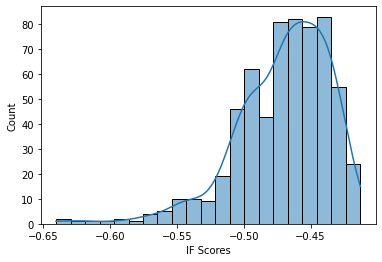

In [ ]:
sns.histplot(data=df_results, x="IF Scores", kde=True);

In [ ]:
df_results['IF Scores'].describe()

count    620.000000
mean      -0.470610
std        0.035426
min       -0.640384
25%       -0.491202
50%       -0.465419
75%       -0.444314
max       -0.412692
Name: IF Scores, dtype: float64

In [ ]:
# No gráfico abaixo fica mais evidente este output
fig = px.scatter(all_tickers, 
                x = 'Date',
                y = 'Adj Close',
                color = 'Flag Anomalia String',
                hover_data = ['IF Scores','Flags','Volume'],
                title = 'Plotando Anomalias')

fig.update_xaxes(
    rangeslider_visible = True,)
fig.show()

In [ ]:
# Escolhendo apenas linhas que não possuim anomalias
df_ticker  = all_tickers.query('Flags == 1')
df_ticker

,Date,Open,High,Low,Close,Adj Close,Volume,BCX,BMIX,BTC-USD,...,NUE,PBR,STLD,X,^BVSP,^DJI,^GSPC,IF Scores,Flags,Flag Anomalia String
5,2020-01-09,30.469999,30.620001,30.250000,30.400000,20.266224,36102700,6.720328,0.00150,7879.071289,...,50.164124,10.643882,31.437445,10.719568,115947.0,28956.900391,3274.699951,-0.489282,1,Normal
6,2020-01-10,30.389999,30.440001,30.129999,30.270000,20.179558,25397500,6.678061,0.00155,8166.554199,...,49.479645,10.569545,30.640722,10.591130,115503.0,28823.769531,3265.350098,-0.491008,1,Normal
7,2020-01-13,30.350000,30.430000,30.209999,30.330000,20.219559,30676800,6.711874,0.00140,8144.194336,...,50.042233,10.461416,31.165617,10.591130,117325.0,28907.050781,3288.129883,-0.487309,1,Normal
8,2020-01-14,30.230000,30.270000,29.770000,30.000000,19.999563,39796500,6.875247,0.00150,8827.764648,...,50.632946,10.387078,31.503054,10.778847,117632.0,28939.669922,3283.149902,-0.486031,1,Normal
9,2020-01-15,29.900000,29.930000,29.540001,29.549999,19.699570,34405700,6.934811,0.00140,8807.010742,...,50.098488,10.049176,30.959410,10.373775,116414.0,29030.220703,3289.290039,-0.472984,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,2022-06-23,26.980000,27.379999,26.120001,26.490000,26.490000,69262300,8.702957,0.01010,21085.876953,...,105.548935,11.100000,65.646973,19.010000,98080.0,30677.359375,3795.729980,-0.488412,1,Normal
600,2022-06-24,26.760000,27.090000,26.180000,26.290001,26.290001,53413400,8.931720,0.00990,21231.656250,...,110.545685,10.950000,68.542274,19.840000,98672.0,31500.679688,3911.739990,-0.486570,1,Normal
602,2022-06-28,28.580000,28.830000,28.020000,28.330000,28.330000,51388000,9.289785,0.01030,20280.634766,...,107.470001,11.890000,67.020004,19.000000,100591.0,30946.990234,3821.550049,-0.487978,1,Normal
603,2022-06-29,28.480000,28.820000,27.840000,28.080000,28.080000,52048800,9.170430,0.01020,20104.023438,...,106.250000,11.830000,66.830002,18.540001,99622.0,31029.310547,3818.830078,-0.489041,1,Normal


In [ ]:
# Definindo variáveis X e y
df_ml = all_tickers #.set_index('Date')
df_rg = df_ticker

df_all_X_train              = df_ml.loc[(df_ml.Date < '2022-07-01')]
df_wo_X_train_sem_outliers  = df_rg.loc[(df_rg.Date < '2022-07-01')]

df_all_X_test               = df_ml.loc[(df_ml.Date >= '2022-07-01')]
df_wo_X_test_sem_outliers   = df_rg.loc[(df_rg.Date >= '2022-07-01')]

df_all_y_train              = df_ml.loc[(df_ml.Date < '2022-07-01')]
df_wo_y_train_sem_outliers  = df_rg.loc[(df_rg.Date < '2022-07-01')]

df_all_y_test               = df_ml.loc[(df_ml.Date >= '2022-07-01')]
df_wo_y_test_sem_outliers   = df_rg.loc[(df_rg.Date >= '2022-07-01')]

# Definindo y como apenas Adj Close
y_train              = df_all_X_train['Adj Close']
y_test               = df_all_X_test['Adj Close']
y_train_sem_outliers  = df_wo_X_train_sem_outliers['Adj Close']
y_test_sem_outliers   = df_wo_X_test_sem_outliers['Adj Close']

# Retirando colunas não pertinentes para o X
X_train             = df_all_X_train.drop(['Date','Adj Close','IF Scores','Flags','Flag Anomalia String','Open','High','Low','Close'],axis = 1)
X_train_sem_outliers      = df_wo_X_train_sem_outliers.drop(['Date','Adj Close','IF Scores','Flags','Flag Anomalia String','Open','High','Low','Close'],axis = 1)
X_test              = df_all_X_test.drop(['Date','Adj Close','IF Scores','Flags','Flag Anomalia String','Open','High','Low','Close'],axis = 1)
X_test_sem_outliers = df_wo_X_test_sem_outliers.drop(['Date','Adj Close','IF Scores','Flags','Flag Anomalia String','Open','High','Low','Close'],axis = 1)

X_train.shape , X_test.shape, y_train.shape, y_test.shape, X_train_sem_outliers.shape, X_test_sem_outliers.shape, y_train_sem_outliers.shape, y_test_sem_outliers.shape 

((605, 15), (15, 15), (605,), (15,), (464, 15), (1, 15), (464,), (1,))

In [ ]:
df_all_X_train

,Date,Open,High,Low,Close,Adj Close,Volume,BCX,BMIX,BTC-USD,...,NUE,PBR,STLD,X,^BVSP,^DJI,^GSPC,IF Scores,Flags,Flag Anomalia String
0,2020-01-02,30.510000,30.700001,30.309999,30.700001,20.466221,37774500,6.864033,0.0016,6985.470215,...,51.683109,10.995300,31.681137,10.689927,118573.0,28868.800781,3257.850098,-0.529162,-1,Anomalia
1,2020-01-03,30.879999,31.240000,30.450001,30.450001,20.299557,71595600,6.889393,0.0016,7344.884277,...,50.998627,10.806075,31.118753,10.610887,117707.0,28634.880859,3234.850098,-0.518887,-1,Anomalia
2,2020-01-06,30.430000,30.940001,29.950001,30.809999,20.539549,81844000,6.855578,0.0016,7769.219238,...,50.567314,10.961509,31.025019,10.660288,116878.0,28703.380859,3246.280029,-0.511954,-1,Anomalia
3,2020-01-07,30.820000,30.879999,30.469999,30.690001,20.459553,32822000,6.796407,0.0016,8163.692383,...,50.454800,10.853380,31.709261,10.996202,116662.0,28583.679688,3237.179932,-0.510756,-1,Anomalia
4,2020-01-08,30.690001,30.770000,30.240000,30.500000,20.332890,48215600,6.745689,0.0016,8079.862793,...,50.332905,10.610093,31.737387,10.966561,116247.0,28745.089844,3253.050049,-0.499777,-1,Anomalia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2022-06-24,26.760000,27.090000,26.180000,26.290001,26.290001,53413400,8.931720,0.0099,21231.656250,...,110.545685,10.950000,68.542274,19.840000,98672.0,31500.679688,3911.739990,-0.486570,1,Normal
601,2022-06-27,26.820000,28.070000,26.660000,27.980000,27.980000,90417700,9.160484,0.0100,20735.478516,...,109.550316,11.780000,68.940262,19.440001,100764.0,31438.259766,3900.110107,-0.491950,-1,Anomalia
602,2022-06-28,28.580000,28.830000,28.020000,28.330000,28.330000,51388000,9.289785,0.0103,20280.634766,...,107.470001,11.890000,67.020004,19.000000,100591.0,30946.990234,3821.550049,-0.487978,1,Normal
603,2022-06-29,28.480000,28.820000,27.840000,28.080000,28.080000,52048800,9.170430,0.0102,20104.023438,...,106.250000,11.830000,66.830002,18.540001,99622.0,31029.310547,3818.830078,-0.489041,1,Normal


# **Random Forest Regressor**

In [ ]:
# Prevendo o volume utilizando o modelo Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_all = RandomForestRegressor(random_state  = 42)
rf_wo = RandomForestRegressor(random_state  = 42)

In [ ]:
# Tareinando modelo com outliers
rf_all.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Treinando modelo sem outliers
rf_wo.fit(X_train_sem_outliers,y_train_sem_outliers)

RandomForestRegressor(random_state=42)

In [ ]:
y_previsto = rf_all.predict(X_test)
y_previsto_sem_outliers = rf_wo.predict(X_test_sem_outliers)

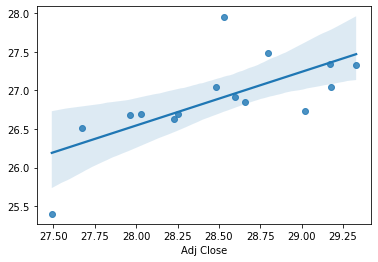

In [ ]:
# Com outliers
sns.regplot(x=y_test, y=y_previsto);

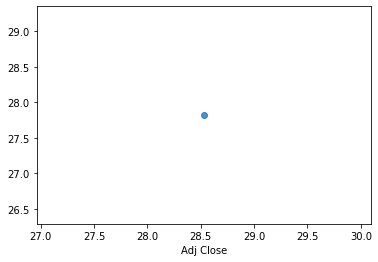

In [ ]:
# Sem outliers
sns.regplot(x=y_test_sem_outliers, y=y_previsto_sem_outliers);

In [ ]:
df_wo_X_test_sem_outliers

,Date,Open,High,Low,Close,Adj Close,Volume,BCX,BMIX,BTC-USD,...,NUE,PBR,STLD,X,^BVSP,^DJI,^GSPC,IF Scores,Flags,Flag Anomalia String
605,2022-07-01,28.08,28.85,27.52,28.530001,28.530001,64948200,8.93172,0.01035,19269.367188,...,105.639999,11.76,66.230003,17.91,98954.0,31097.259766,3825.330078,-0.490262,1,Normal


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

def mean_absolute_percentage_error(y_test,y_previsto):
  y_test,y_previsto = np.array(y_test),np.array(y_previsto)
  return np.mean(np.abs ((y_test - y_previsto)/ y_test)) * 100

def mean_absolute_percentage_error_sem_outliers(y_test_sem_outliers,y_previsto_sem_outliers):
  y_test_sem_outliers,y_previsto_sem_outliers = np.array(y_test_sem_outliers),np.array(y_previsto_sem_outliers)
  return np.mean(np.abs ((y_test_sem_outliers - y_previsto_sem_outliers)/ y_test_sem_outliers)) * 100

In [ ]:
MAE  = mean_absolute_error(y_test,y_previsto)
MAE_sem_outliers  = mean_absolute_error(y_test_sem_outliers,y_previsto_sem_outliers)

MAPE = mean_absolute_percentage_error(y_test,y_previsto)
MAPE_sem_outliers = mean_absolute_percentage_error_sem_outliers(y_test_sem_outliers,y_previsto_sem_outliers)

MSE  = mean_squared_error(y_test,y_previsto)
MSE_sem_outliers  = mean_squared_error(y_test_sem_outliers,y_previsto_sem_outliers)

RMSE = np.sqrt(MSE)
RMSE_sem_outliers = np.sqrt(MSE_sem_outliers)

print("MAE  = {:0.2f}".format(MAE))
print("MAE_sem_outliers  = {:0.2f}".format(MAE_sem_outliers))
print("MAPE = {:0.2f}%".format(MAPE))
print("MAPE_sem_outliers = {:0.2f}%".format(MAPE_sem_outliers))
print("MSE  = {:0.2f}".format(MSE))
print("MSE_sem_outliers  = {:0.2f}".format(MSE_sem_outliers))
print("RMSE = {:0.2f}".format(RMSE))
print("RMSE_sem_outliers = {:0.2f}".format(RMSE_sem_outliers))


MAE  = 1.60
MAE_sem_outliers  = 0.71
MAPE = 5.62%
MAPE_sem_outliers = 2.49%
MSE  = 2.76
MSE_sem_outliers  = 0.50
RMSE = 1.66
RMSE_sem_outliers = 0.71




> Temos uma incerteza de prever de **17,72%**



# **XGBoost Regressor**





In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from xgboost import XGBRegressor
import numpy as np
from statistics import mean,median,stdev

In [ ]:
XGBR = XGBRegressor(random_state = 42)
XGBR_sem_outliers = XGBRegressor(random_state = 42)

XGBR.fit(X_train,y_train)
XGBR_sem_outliers.fit(X_train_sem_outliers,y_train_sem_outliers)

p = XGBR.predict(X_test)
p_sem_outliers = XGBR_sem_outliers.predict(X_test_sem_outliers)

[20:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
def mean_absolute_percentage_error(y_test,p):
  y_test,p = np.array(y_test),np.array(p)
  return np.mean(np.abs ((y_test - p)/ y_test)) * 100

def mean_absolute_percentage_error_sem_outliers(y_test_sem_outliers,p_sem_outliers):
  y_test_sem_outliers,p_sem_outliers = np.array(y_test_sem_outliers),np.array(p_sem_outliers)
  return np.mean(np.abs ((y_test_sem_outliers - p_sem_outliers)/ y_test_sem_outliers)) * 100

In [ ]:
MAE_XGBR  = mean_absolute_error(y_test,p)
MAE_sem_outliers_XGBR  = mean_absolute_error(y_test_sem_outliers,p_sem_outliers)

MAPE_XGBR = mean_absolute_percentage_error(y_test,p)
MAPE_sem_outliers_XGBR = mean_absolute_percentage_error_sem_outliers(y_test_sem_outliers,p_sem_outliers)

MSE_XGBR  = mean_squared_error(y_test,p)
MSE_sem_outliers_XGBR  = mean_squared_error(y_test_sem_outliers,p_sem_outliers)

RMSE_XGBR = np.sqrt(MSE)
RMSE_sem_outliers_XGBR = np.sqrt(MSE_sem_outliers)

print('-'*90)
print("MAE                    = {:0.2f}".format(MAE))
print("MAE_XGBR               = {:0.2f}".format(MAE_XGBR))
print("MAE_sem_outliers       = {:0.2f}".format(MAE_sem_outliers))
print("MAE_sem_outliers_XGBR  = {:0.2f}".format(MAE_sem_outliers_XGBR))
print('-'*90)
print("Média    = {:0.2f}".format(mean(all_tickers['Adj Close'])))
print("Mediana  = {:0.2f}".format(median(all_tickers['Adj Close'])))
print("Desvio   = {:0.2f}".format(stdev(all_tickers['Adj Close'])))
print('-'*90)
print("MAPE                   = {:0.2f}%".format(MAPE))
print("MAPE_XGBR              = {:0.2f}%".format(MAPE_XGBR))
print("MAPE_sem_outliers      = {:0.2f}%".format(MAPE_sem_outliers))
print("MAPE_sem_outliers_XGBR = {:0.2f}%".format(MAPE_sem_outliers_XGBR))
print('-'*90)
print("MSE                    = {:0.2f}".format(MSE))
print("MSE_XGBR               = {:0.2f}".format(MSE_XGBR))
print("MSE_sem_outliers       = {:0.2f}".format(MSE_sem_outliers))
print("MSE_sem_outliers_XGBR  = {:0.2f}".format(MSE_sem_outliers_XGBR))
print('-'*90)
print("RMSE                   = {:0.2f}".format(RMSE))
print("RMSE_XGBR              = {:0.2f}".format(RMSE_XGBR))
print("RMSE_sem_outliers      = {:0.2f}".format(RMSE_sem_outliers))
print("RMSE_sem_outliers_XGBR = {:0.2f}".format(RMSE_sem_outliers_XGBR))
print('-'*90)

------------------------------------------------------------------------------------------
MAE                    = 1.60
MAE_XGBR               = 1.37
MAE_sem_outliers       = 0.71
MAE_sem_outliers_XGBR  = 0.78
------------------------------------------------------------------------------------------
Média    = 19.24
Mediana  = 18.86
Desvio   = 5.44
------------------------------------------------------------------------------------------
MAPE                   = 5.62%
MAPE_XGBR              = 4.81%
MAPE_sem_outliers      = 2.49%
MAPE_sem_outliers_XGBR = 2.74%
------------------------------------------------------------------------------------------
MSE                    = 2.76
MSE_XGBR               = 2.09
MSE_sem_outliers       = 0.50
MSE_sem_outliers_XGBR  = 0.61
------------------------------------------------------------------------------------------
RMSE                   = 1.66
RMSE_XGBR              = 1.66
RMSE_sem_outliers      = 0.71
RMSE_sem_outliers_XGBR = 0.71
-----------

In [ ]:
caracteristicas_importantes = pd.DataFrame(rf_wo.feature_importances_, X_test.columns).sort_values(by=0, ascending=False)
display(caracteristicas_importantes)
top10 = list(caracteristicas_importantes.index)[:10]
print(top10)

,0
PBR,0.904826
FXI,0.030131
ITUB4.SA,0.022110
BCX,0.011125
^BVSP,0.010443
^GSPC,0.003740
BTC-USD,0.003403
^DJI,0.003262
CLF,0.002596
X,0.002335


['PBR', 'FXI', 'ITUB4.SA', 'BCX', '^BVSP', '^GSPC', 'BTC-USD', '^DJI', 'CLF', 'X']


# **Tunning de Hiperparâmetros com Grid Search e Random Search**

> O Grid Search (GS), ou busca em grade, é um algoritmo criado com o objetivo principal de se realizar o tuning de nossos hiperparâmetros buscando a melhor configuração dentro de um conjunto de valores, testando todas as combinações dentro da vizinhança.

> O Random Search (RS) é um ótimo otimizador de hiperparâmetros, que funciona de forma semelhante ao grid search entretanto ao invés de testar todas as combinações com a vizinhança, o RS, ou busca aleatória, testa todas as combinações aleatórias dos hiperparâmetros, conforme um número de amostras especificado definido pelo usuário.

In [ ]:
## Grid e Random Search com Cross Validation(CV)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

## n_estimators: o número de arvores a serem geradas
## min_samples_split: o número mínimo de amostras necessárias para dividir um nó interno.
## min_samples_leaf: o número mínimo de amostras necessárias para estar em um nó da folha.
## max_features: o número de variáveis a serem considerados ao procurar a melhor divisão.

# Definindo dataframe
X_train_grid = df_rg.drop(['Date','Volume','Adj Close','IF Scores','Flags','Flag Anomalia String','Open','High','Low','Close'],axis = 1)
y_test_grid  = df_rg['Adj Close']

## Grid Search
grid_search_cv = GridSearchCV(estimator = rf_wo, # Random Forest
                              param_grid = {'max_depth':range(1,50)}, # Testando número de comprimentos de 1 a 50
                              scoring='neg_mean_absolute_error', # Métrica neg_mean_absolute_error
                              cv = 4) ## Cross Validation de 4

## Grid Search (.fit) para os dados passados
grid_search_cv.fit(X_train_grid,y_test_grid)
# Observando o melhor comprimento encontrado e o desempenho da métrica
print('Melhor comprimento máximo                          : {}'.format(grid_search_cv.best_params_['max_depth']))
print('Desempenho neg_mean_absolute_error do melhor modelo: {}'.format(round(grid_search_cv.best_score_,2)))

Melhor comprimento máximo                          : 6
Desempenho neg_mean_absolute_error do melhor modelo: -2.27


In [ ]:
## Random Search
## N Estimators
n_estimators = [25, 50, 100, 200, 500, 900, 1100, 1500, 2500]
## Min Samples Split
min_samples_split = [2, 4, 6, 10]
## Min Samples Leaf
min_samples_leaf = [1, 2, 4, 6, 8]
## Max Features
max_features = ['auto', 'sqrt','log2', None]

# Criando o Random Search
rf_parametros = {
                'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features}
## Random Forest Tuning
RFtuning = RandomizedSearchCV(estimator=rf_wo, ## Random Forest
                              param_distributions=rf_parametros, ## Parâmetros
                              cv=4, ## Cross validation
                              n_iter=20, ## Número de Iterações
                              scoring = 'neg_mean_absolute_error', ## Métrica
                              n_jobs = -1, ## Utilizando todos os processadores
                              verbose = 1)
## Fazendo o fit do tuning
RFtuning.fit(X_train_grid,y_test_grid)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [25, 50, 100, 200, 500,
                                                         900, 1100, 1500,
                                                         2500]},
                   scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
## Melhor configuração encontrada para cada parâmetro
print('Melhor número de árvores: {}'.format(RFtuning.best_params_['n_estimators']))
print('Melhor número número mínimo de amostras necessárias para dividir um nó interno: {}'.format(RFtuning.best_params_['min_samples_split']))
print('Melhor número mínimo de amostras necessárias para estar em um nó da folha: {}'.format(RFtuning.best_params_['min_samples_leaf']))
print('Melhor número de variáveis a serem considerados ao procurar a melhor divisão: {}'.format(RFtuning.best_params_['max_features']))

Melhor número de árvores: 900
Melhor número número mínimo de amostras necessárias para dividir um nó interno: 10
Melhor número mínimo de amostras necessárias para estar em um nó da folha: 2
Melhor número de variáveis a serem considerados ao procurar a melhor divisão: None


In [ ]:
## Descobrindo quais parametros foram gerados pelo Random Search
RFtuning.best_estimator_

RandomForestRegressor(max_features=None, min_samples_leaf=2,
                      min_samples_split=10, n_estimators=900, random_state=42)

# **Retreinando o modelo e comparando resultados**

In [ ]:
# Fazendo um Feature Selection com as top 3 features 
X_train_tunning = X_train_sem_outliers[['PBR','ITUB4.SA','FXI']]
X_test_tunning = X_test_sem_outliers[['PBR','ITUB4.SA','FXI']]                 

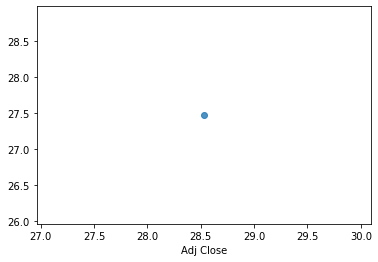

In [ ]:
# Retreinando cm o modelo tunado
rf_tunning = RandomForestRegressor(max_features=None, min_samples_leaf=2,
                      min_samples_split=10, n_estimators=900, random_state=42)

# Treinando modelo sem outliers
rf_tunning.fit(X_train_tunning,y_train_sem_outliers)

y_previsto_tunning = rf_tunning.predict(X_test_tunning)

# Sem outliers
sns.regplot(x=y_test_sem_outliers, y=y_previsto_tunning);

In [ ]:
def mean_absolute_percentage_error_tunning(y_test_sem_outliers,y_previsto_tunning):
  y_test_sem_outliers,y_previsto_tunning = np.array(y_test_sem_outliers),np.array(y_previsto_tunning)
  return np.mean(np.abs ((y_test_sem_outliers - y_previsto_tunning)/ y_test_sem_outliers)) * 100

In [ ]:
MAE_tunning  = mean_absolute_error(y_test_sem_outliers,y_previsto_tunning)
MAPE_tunning = mean_absolute_percentage_error_sem_outliers(y_test_sem_outliers,y_previsto_tunning)
MSE_tunning  = mean_squared_error(y_test_sem_outliers,y_previsto_tunning)
RMSE_tunning = np.sqrt(MSE_tunning)

print('-'*90)
print("MAE_sem_outliers       = {:0.2f}".format(MAE_sem_outliers))
print("MAE_tunning            = {:0.2f}".format(MAE_tunning))
print('-'*90)
print("Média                  = {:0.2f}".format(mean(all_tickers['Adj Close'])))
print("Mediana                = {:0.2f}".format(median(all_tickers['Adj Close'])))
print("Desvio                 = {:0.2f}".format(stdev(all_tickers['Adj Close'])))
print('-'*90)
print("MAPE_sem_outliers      = {:0.2f}%".format(MAPE_sem_outliers))
print("MAPE_tunning           = {:0.2f}%".format(MAPE_tunning))
print('-'*90)
print("MSE_sem_outliers       = {:0.2f}".format(MSE_sem_outliers))
print("MSE_sem_outliers_XGBR  = {:0.2f}".format(MSE_sem_outliers_XGBR))
print('-'*90)
print("RMSE_sem_outliers      = {:0.2f}".format(RMSE_sem_outliers))
print("RMSE_tunning           = {:0.2f}".format(RMSE_tunning))
print('-'*90)

------------------------------------------------------------------------------------------
MAE_sem_outliers       = 0.71
MAE_tunning            = 1.05
------------------------------------------------------------------------------------------
Média                  = 19.24
Mediana                = 18.86
Desvio                 = 5.44
------------------------------------------------------------------------------------------
MAPE_sem_outliers      = 2.49%
MAPE_tunning           = 3.70%
------------------------------------------------------------------------------------------
MSE_sem_outliers       = 0.50
MSE_sem_outliers_XGBR  = 0.61
------------------------------------------------------------------------------------------
RMSE_sem_outliers      = 0.71
RMSE_tunning           = 1.05
------------------------------------------------------------------------------------------
